In [ ]:
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from torchvision import datasets, models, transforms
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch.nn as nn
import numpy as np
import sklearn
import torch
import csv   
import cv2


In [1]:

data_files = {"train": ["./Dataset/validation/data-00000-of-00001.arrow"]}
my_dataset = load_dataset("arrow", data_files=data_files, split="train")
df=my_dataset.to_pandas()
df.head()   
x = []
y = []

for item in df["image"]:
    image_bytes = item['bytes']
    # Decodificar la imagen desde bytes
    image_array = np.frombuffer(image_bytes, dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
    # Redimensionar la imagen a 48x48 píxeles
    image = cv2.resize(image, (96, 96))
    x.append(image)


In [16]:
text = pd.read_csv("test_outputs1.csv")

set(text["age"])
j=0
age=[]
for i in text["age"]:
    if i=='0-2':
        age.append(0)
    elif i=='3-9':
        age.append(1)
    elif i=='10-19':
        age.append(2)
    elif i=='20-29':
        age.append(3)    
    elif i=='30-39':
        age.append(4)
    elif i=='40-49':
        age.append(5)  
    elif i=='50-59':
        age.append(6)
    elif i=='60-69':
        age.append(7)
    elif i=='70+':
        age.append(8)
    else:
        print(i)
    j+=1
sex=[]
j=0
for i in text["gender"]:
    if i=='Male':
        sex.append(0)
    elif i=='Female':
        sex.append(1)
race=[]
j=0
for i in text["race"]:
    if i=='White':
        race.append(0)
    elif i=='Black':
        race.append(1)
    elif i=='Latino_Hispanic':
        race.append(2) 
    elif i=='East Asian':
        race.append(3) 
    elif i=='Southeast Asian':
        race.append(4)
    elif i=='Indian':
        race.append(5) 
    elif i=='Middle Eastern':
        race.append(6)  
    else:
        print(i)
    j+=1
j

10954

In [17]:

precision = accuracy_score(df['age'], age)
print(f'La precisión de tu modelo edad es: {precision}')
precision1 = accuracy_score(df['gender'], sex)
print(f'La precisión de tu modelo sexo es: {precision1}')
precision2 = accuracy_score(df['race'], race)
print(f'La precisión de tu modelo raza es: {precision2}')

La precisión de tu modelo edad es: 0.30719371918933724
La precisión de tu modelo sexo es: 0.713255431805733
La precisión de tu modelo raza es: 0.1677925871827643


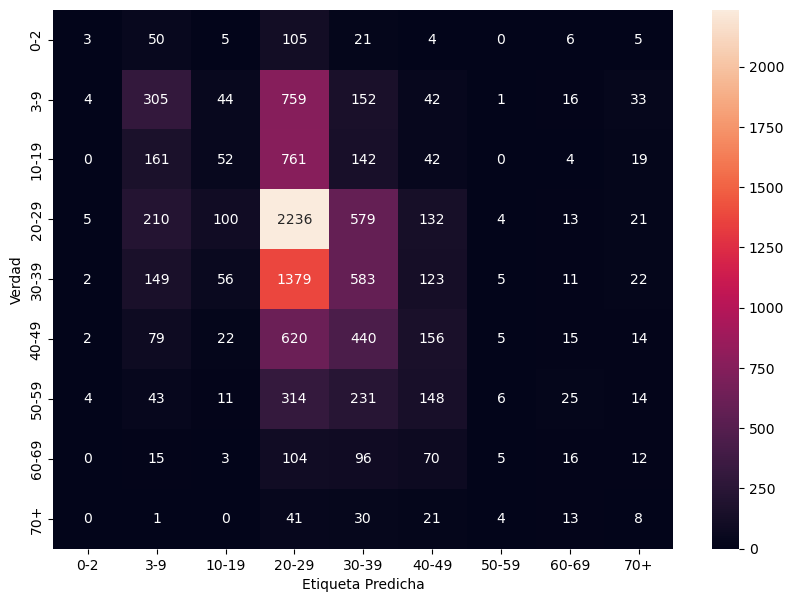

In [50]:
text = pd.read_csv("test_outputs1.csv")

unique_labels = ['0-2','3-9','10-19','20-29','30-39','40-49','50-59','60-69','70+']  
cm=sklearn.metrics.confusion_matrix(df['age'], age)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=unique_labels, yticklabels=unique_labels)

# Configurar los ejes
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Verdad')

# Mostrar el gráfico
plt.show()

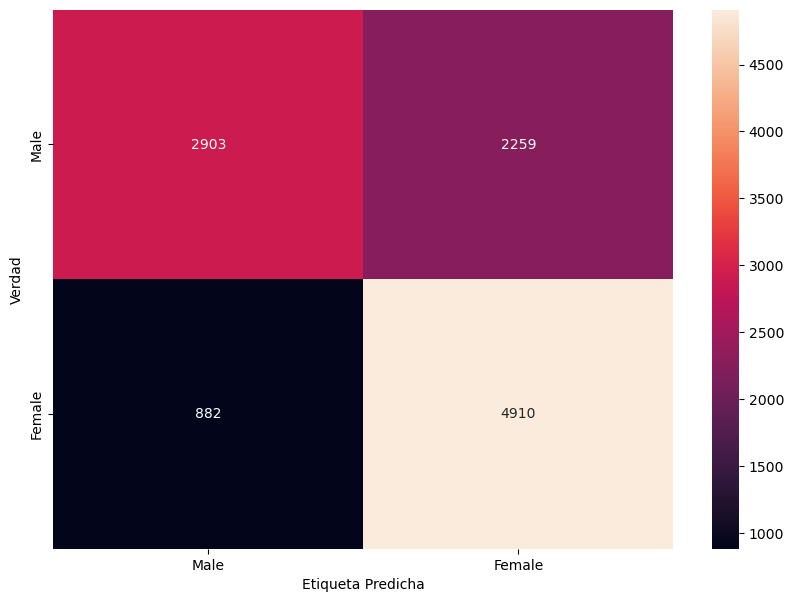

In [48]:
text = pd.read_csv("test_outputs1.csv")

unique_labels = ['Male', 'Female'] 
cm=sklearn.metrics.confusion_matrix(df1, text['gender'])
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=unique_labels, yticklabels=unique_labels)

# Configurar los ejes
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Verdad')

# Mostrar el gráfico
plt.show()

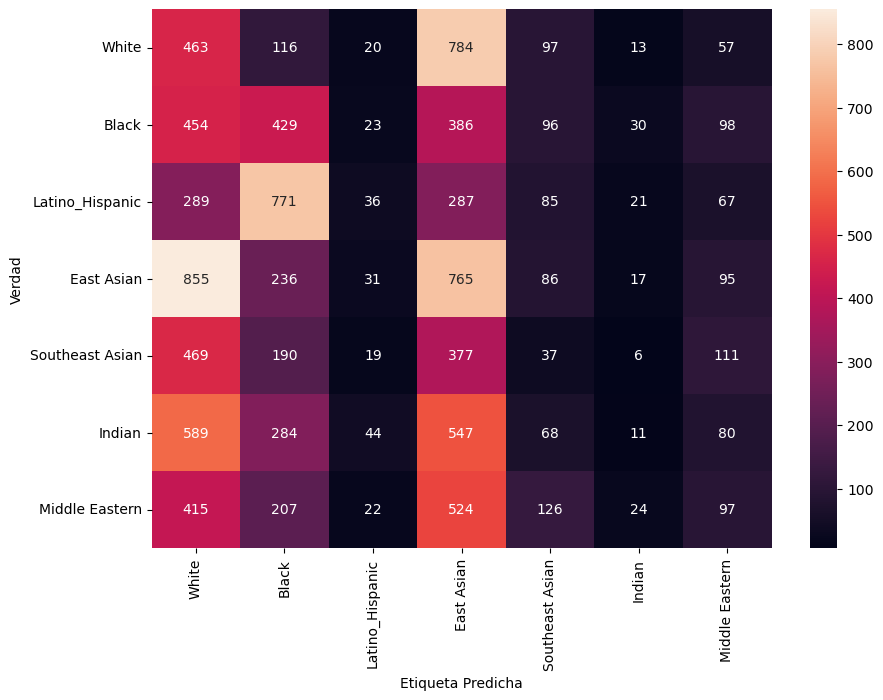

In [56]:
text = pd.read_csv("test_outputs1.csv")

unique_labels = ['White', 'Black', 'Latino_Hispanic','East Asian','Southeast Asian','Indian','Middle Eastern'] 
cm=sklearn.metrics.confusion_matrix(df['race'], race)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=unique_labels, yticklabels=unique_labels)

# Configurar los ejes
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Verdad')

# Mostrar el gráfico
plt.show()

In [59]:

recall = recall_score(df["age"], age, average='weighted')
f1 = f1_score(df["age"], age, average='weighted')
print(f"Recall age : {recall:.2f}")
print(f"F1 Score age: {f1:.2f}")

recall = recall_score(df["gender"], sex, average='weighted')
f1 = f1_score(df["gender"], sex, average='weighted')
print(f"Recall gender : {recall:.2f}")
print(f"F1 Score gender: {f1:.2f}")

recall = recall_score(df["race"], race, average='weighted')
f1 = f1_score(df["race"], race, average='weighted')
print(f"Recall race : {recall:.2f}")
print(f"F1 Score race: {f1:.2f}")

Recall age : 0.31
F1 Score age: 0.26
Recall gender : 0.71
F1 Score gender: 0.71
Recall race : 0.17
F1 Score race: 0.13


In [52]:
print(sklearn.metrics.classification_report(df["age"], age))

              precision    recall  f1-score   support

           0       0.15      0.02      0.03       199
           1       0.30      0.22      0.26      1356
           2       0.18      0.04      0.07      1181
           3       0.35      0.68      0.46      3300
           4       0.26      0.25      0.25      2330
           5       0.21      0.12      0.15      1353
           6       0.20      0.01      0.01       796
           7       0.13      0.05      0.07       321
           8       0.05      0.07      0.06       118

    accuracy                           0.31     10954
   macro avg       0.20      0.16      0.15     10954
weighted avg       0.27      0.31      0.26     10954



In [53]:
print(sklearn.metrics.classification_report(df["gender"], sex))

              precision    recall  f1-score   support

           0       0.68      0.85      0.76      5792
           1       0.77      0.56      0.65      5162

    accuracy                           0.71     10954
   macro avg       0.73      0.71      0.70     10954
weighted avg       0.72      0.71      0.71     10954



In [54]:
print(sklearn.metrics.classification_report(df["race"], race))

              precision    recall  f1-score   support

           0       0.13      0.30      0.18      1550
           1       0.19      0.28      0.23      1516
           2       0.18      0.02      0.04      1556
           3       0.21      0.37      0.27      2085
           4       0.06      0.03      0.04      1209
           5       0.09      0.01      0.01      1623
           6       0.16      0.07      0.10      1415

    accuracy                           0.17     10954
   macro avg       0.15      0.15      0.12     10954
weighted avg       0.15      0.17      0.13     10954

